# Diabetes Detection Using Bagiing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df[['DiabetesPedigreeFunction', 'Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [4]:
X.head()

,DiabetesPedigreeFunction,Glucose,BMI,Age
0,0.627,148,33.6,50
1,0.351,85,26.6,31
2,0.672,183,23.3,32
3,0.167,89,28.1,21
4,2.288,137,43.1,33


In [5]:
X.shape

(768, 4)

In [6]:
y.shape

(768,)

In [7]:
y.value_counts()/768

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X_sc = StandardScaler()

In [10]:
X = X_sc.fit_transform(X)

In [11]:
X = pd.DataFrame(data=X, columns=['DiabetesPedigreeFunction', 'Glucose', 'BMI', 'Age'])

In [12]:
X.head()

,DiabetesPedigreeFunction,Glucose,BMI,Age
0,0.468492,0.848324,0.204013,1.425995
1,-0.365061,-1.123396,-0.684422,-0.190672
2,0.604397,1.943724,-1.103255,-0.105584
3,-0.920763,-0.998208,-0.494043,-1.041549
4,5.484909,0.504055,1.409746,-0.020496


## Devide Train Test Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

***

# Model Performance

## Performance function

In [15]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Designing Model

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [18]:
bag_clf = BaggingClassifier(base_estimator=SVC())

In [19]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [44]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train = True)
print_score(bag_clf, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.8046

Classification Report : 
              precision    recall  f1-score   support

          0       0.82      0.91      0.86       401
          1       0.78      0.62      0.69       213

avg / total       0.80      0.80      0.80       614
 

Confusion Metrics : 
 [[363  38]
 [ 82 131]] 

Average Accuracy : 0.7703

Accuracy SD : 0.0310

Test Result : 

Accuracy Score 0.7857

Classification Report : 
              precision    recall  f1-score   support

          0       0.82      0.86      0.84        99
          1       0.72      0.65      0.69        55

avg / total       0.78      0.79      0.78       154


Confusion Metrics : 
 [[85 14]
 [19 36]] 



## Boosting

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=10), n_estimators=1000)

In [23]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=None)

In [24]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train = True)
print_score(ada_clf, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 1.0000

Classification Report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       401
          1       1.00      1.00      1.00       213

avg / total       1.00      1.00      1.00       614
 

Confusion Metrics : 
 [[401   0]
 [  0 213]] 

Average Accuracy : 0.7411

Accuracy SD : 0.0400

Test Result : 

Accuracy Score 0.7403

Classification Report : 
              precision    recall  f1-score   support

          0       0.82      0.76      0.79        99
          1       0.62      0.71      0.66        55

avg / total       0.75      0.74      0.74       154


Confusion Metrics : 
 [[75 24]
 [16 39]] 



In [54]:
from sklearn.metrics import roc_curve

In [61]:
y_scores = cross_val_predict(ada_clf, X_train, y_train, cv=3, method='decision_function')

In [62]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

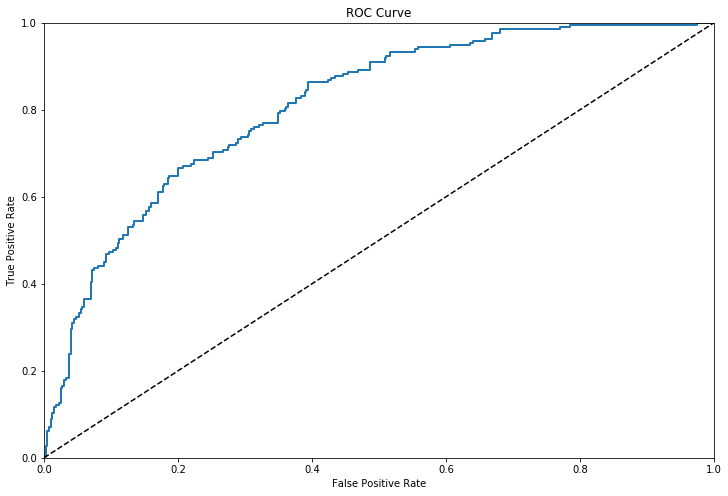

In [64]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [65]:
y_scores = cross_val_predict(bag_clf, X_train, y_train, cv=3, method='decision_function')

In [66]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

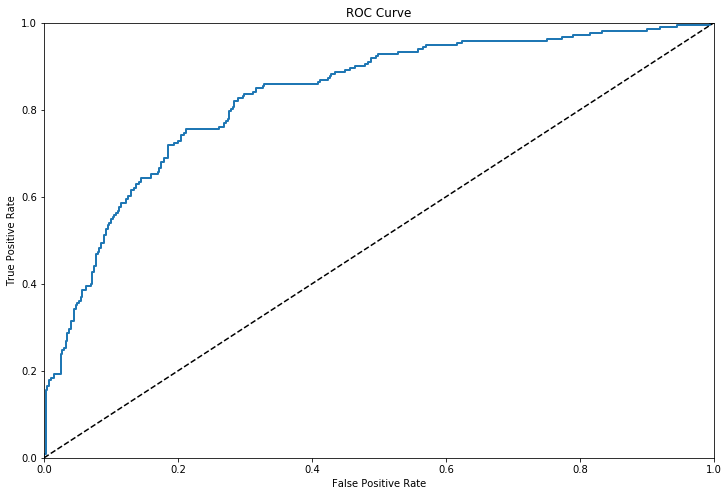

In [67]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();